In [12]:
#Importando as bibliotecas

import pandas as pd # Pandas para tratamento com Data Frames
import seaborn as srn # para uso de gráficos e análise exploratória
import statistics as sts # para cálculos de desvio padrão e busca de outliers

In [13]:
#Importando os dados
dataset = pd.read_csv("Churn.csv", sep=";")
#Visualizando os dados importados
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [14]:
#Percebemos que o cabeçalho está completamente desconfigurado
#devemos dar um nome para cada coluna conforme procedimento abaixo

In [17]:
#verificando o tamanho da tabela de dados que importou
dataset.shape #são 999 linhas e 12 colunas

(999, 12)

In [18]:
#Dando nome das colunas
dataset.columns = ["ID","Score","Estado","Gênero","Idade","Patrimônio","Saldo","Produtos","CartCrédito","Ativo","Salário","Saiu"]

In [19]:
#visualizando após as alterações dos nomes de cada coluna
dataset.head()

,ID,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,CartCrédito,Ativo,Salário,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [20]:
#explorando dados categóricos, por colunas
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

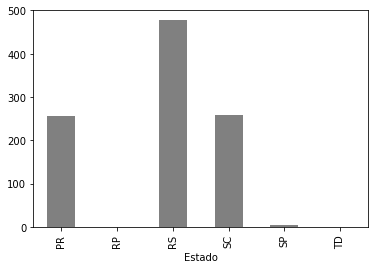

In [21]:
#visualizando a coluna Estado de forma gráfica
agrupado.plot.bar(color = 'gray')

In [22]:
#genero
agrupadog = dataset.groupby(['Gênero']).size()
agrupadog

Gênero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

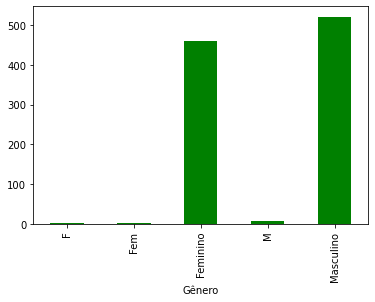

In [23]:
agrupadog.plot.bar(color = 'green')

In [24]:
#explorar colunas numéricas
#score
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

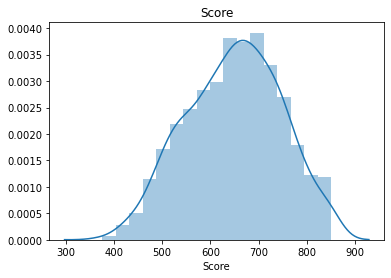

In [25]:
#verificando a coluna score através de gráficos
srn.distplot(dataset['Score']).set_title('Score')

In [26]:
#explorar colunas numéricas
#Idade
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

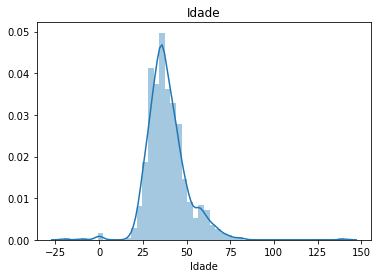

In [27]:
srn.distplot(dataset['Idade']).set_title('Idade')

In [28]:
#explorando colunas numéricas
dataset['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

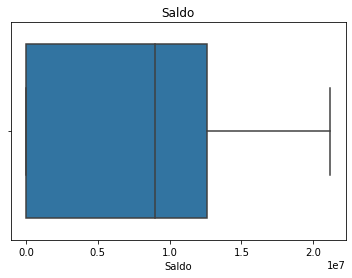

In [29]:
srn.boxplot(dataset['Saldo']).set_title('Saldo')

In [30]:
#explorar colunas numéricas
#Idade
dataset['Salário'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salário, dtype: float64

In [31]:
#Verificando todos os valores nulos existentes na tabela
dataset.isnull().sum() #detectado em gênero e salário

ID             0
Score          0
Estado         0
Gênero         8
Idade          0
Patrimônio     0
Saldo          0
Produtos       0
CartCrédito    0
Ativo          0
Salário        7
Saiu           0
dtype: int64

## Tratamento dos dados

In [32]:
#Eliminando os valores nulos na coluna salário.
#devem ser substituídos pela mediana
dataset['Salário'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salário, dtype: float64

In [33]:
mediansal = sts.median(dataset['Salário'])
mediansal

70518.0

In [34]:
#colocando a mediana nos valores nulos
dataset['Salário'].fillna(mediansal, inplace=True)

In [35]:
#verificando novamente se possui algum valor nulo
dataset['Salário'].isnull().sum()

0

In [58]:
#analisando os possíveis outliers na coluna salário com desvios padrão
desv = sts.stdev(dataset['Salário'])
desv

528988918.4679201

In [59]:
#analisando os desvios padrão
dataset.loc[dataset['Salário'] >= 2 * desv ]

,ID,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,CartCrédito,Ativo,Salário,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [61]:
#verificando a mediana em Salário
mediansal = sts.median(dataset['Salário'])
mediansal

8637195.5

In [65]:
#substituindo os valores fora do padrão pela mediana
dataset.loc[dataset['Salário'] >= 2 * desv, 'Salário'] = mediansal
#checando...
dataset.loc[dataset['Salário'] >= 2 * desv]

,ID,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,CartCrédito,Ativo,Salário,Saiu


In [36]:
#Agora vamos para a coluna Gênero padronizando e elmiminando os nulos
agrugen = dataset.groupby(['Gênero']).size()
agrugen

Gênero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [37]:
#verificando os nulos na coluna Gênero
dataset['Gênero'].isnull().sum()

8

In [38]:
#eliminando os nulos na coluna Gênero
dataset['Gênero'].fillna('Masculino', inplace=True)

In [39]:
dataset['Gênero'].isnull().sum()

0

In [40]:
#padronizando de acordo com as categorias corretas
dataset.loc[dataset['Gênero'] == 'M', 'Gênero'] = "Masculino"
dataset.loc[dataset['Gênero'].isin(['Fem', 'F']), 'Gênero'] = "Feminino"

In [41]:
#visualizando se possui alguma informação divergente
agrugen = dataset.groupby(['Gênero']).size()
agrugen

Gênero
Feminino     464
Masculino    535
dtype: int64

##Eliminação dos valores nulos e padronização efetuadas em Salário e Gênero

In [42]:
#visualizando a coluna Idade
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [43]:
#Os valores da coluna idade possuem 2 divergências:
#valor negativo no min e fora do padrão no max

In [44]:
#Visualizando os valores divergentes para resolver o problema
dataset.loc[(dataset['Idade'] < 0) | ( dataset['Idade'] > 120) ]

,ID,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,CartCrédito,Ativo,Salário,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [45]:
#verificando a mediana da idade
medianid = sts.median(dataset['Idade'])
medianid

37

In [46]:
#substituindo os valores divergentes pela mediana
dataset.loc[(dataset['Idade'] < 0) | ( dataset['Idade'] > 120), 'Idade'] = medianid

In [47]:
#visualizando novamente para confirmar alterações
dataset.loc[(dataset['Idade'] < 0) | ( dataset['Idade'] > 120) ]

,ID,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,CartCrédito,Ativo,Salário,Saiu


In [48]:
#verificando se há possibiidade de dados duplicados pelo ID
dataset[dataset.duplicated(['ID'],keep=False)]

,ID,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,CartCrédito,Ativo,Salário,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [49]:
#se realmente forem iguais, prossiga com a eliminação de um
dataset.drop_duplicates(subset="ID", keep='first',inplace=True)

In [50]:
#verificando novamente sobre dados duplicados pelo ID
dataset[dataset.duplicated(['ID'],keep=False)]

,ID,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,CartCrédito,Ativo,Salário,Saiu


In [52]:
#verificando na coluna Estado as informações fora do domínio
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [53]:
#acima a visualização que possuem 3 estados fora do padrão: RP, SP e TD, que devem ser substituídos pela mediana
dataset.loc[dataset['Estado'].isin(['RP','SP','TD']), 'Estado'] = "RS"
agrupado = dataset.groupby(['Estado']).size()

In [54]:
#verificando o resultado da alteração
agrupado

Estado
PR    257
RS    483
SC    258
dtype: int64

In [66]:
#verificando a tabela atualizada com as alterações efetuadas no tratamento
dataset.head()

,ID,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,CartCrédito,Ativo,Salário,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [67]:
dataset

,ID,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,CartCrédito,Ativo,Salário,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0
